Matplotlib - TimeSeries

In [147]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import matplotlib.dates as mpl_dates
import datetime

In [172]:
# Datetime basics - Part 1

# Creating a datetime object

d = datetime.date(2019, 10, 26)
print('Datetime object: {}'.format(d))
print('Type: {}'.format(type(d)))

# Todays date

t = datetime.date.today()
print("\nToday's date: {}".format(t))
print('Type: {}'.format(type(t)))

# Calculating a time interval

delta_t = t-d
delta_t_minutes = delta_t
delta_t_days = delta_t.days

print("\nDelta (days): {}".format(delta_t_days))

# Specific time interval

delta_t_1 = datetime.timedelta(seconds=1000)
print('\nInterval (1000 sec): {}'.format(delta_t_1))


Datetime object: 2019-10-26
Type: <class 'datetime.date'>

Today's date: 2020-07-22
Type: <class 'datetime.date'>

Delta (days): 270

Interval (1000 sec): 0:16:40


In [186]:
# Datetime basics - Part 2 

# Converting datetime objects to strings

t = datetime.date.today()
t_str = t.strftime('%B %d, %Y')
print("Today (datetime obejct): {}".format(t))
print("Today (string): {}".format(t_str))

string_i = t_str
dt = datetime.datetime.strptime(string_i, '%B %d, %Y')

print('\nToday (datetime): {}'.format(dt))

Today (datetime obejct): 2020-07-22
Today (string): July 22, 2020

Today (datetime): 2020-07-22 00:00:00


In [188]:
# Importing Data

csv_path = ('/Users/antonioelias/Desktop/MOOCs/Python Coding Bootcamp/Data Science Libs/microsoft.csv')
microsoft_data = pd.read_csv(csv_path)
microsoft_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-08,119.809998,120.019997,118.639999,119.930000,118.363968,15116200
1,2019-04-09,118.629997,119.540001,118.580002,119.279999,117.722450,17612000
2,2019-04-11,120.540001,120.849998,119.919998,120.330002,118.758751,14209100
3,2019-04-12,120.639999,120.980003,120.370003,120.949997,119.370651,19745100
4,2019-04-15,120.940002,121.580002,120.570000,121.050003,119.469353,15792600


In [195]:
# DataFrame Infos + Summary Statistics

microsoft_data.info()
microsoft_data.describe()

# Note that the 'Date' column has Dtype == object and not datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,144.473770,145.972778,142.936905,144.547103,143.725583,3.013386e+07
std,15.571227,15.998560,15.167923,15.644981,16.018049,1.785521e+07
min,118.629997,119.540001,118.580002,119.279999,117.722450,8.989200e+06
25%,135.760002,136.557499,133.652500,135.532498,134.488182,1.886612e+07
50%,139.724998,140.530006,138.114998,139.120002,138.270546,2.413585e+07
75%,152.417504,155.802502,151.290001,154.409996,153.989399,3.306405e+07
max,190.649994,190.699997,186.470001,188.699997,188.185989,9.707360e+07


In [368]:
# Creating Series 

open = microsoft_data.loc[0:50, 'Open']
date = microsoft_data.loc[0:50, 'Date']
volume = microsoft_data.loc[0:50, 'Volume']

date.head()

0    2019-04-08
1    2019-04-09
2    2019-04-11
3    2019-04-12
4    2019-04-15
Name: Date, dtype: object

In [352]:
# Converting Series to datetime

date = pd.to_datetime(date)
date.sort_values(inplace=True) # Note that date was already sorted

date.head(), date.tail()

start_date = date.iloc[0]
start_date = start_date.strftime('%B %d, %Y')

end_date = date.iloc[-1]
end_date = end_date.strftime('%B %d, %Y')

print('\nStart date: {}'.format(start_date))
print('\nEnd date: {}'.format(end_date))


Start date: April 08, 2019

End date: June 19, 2019


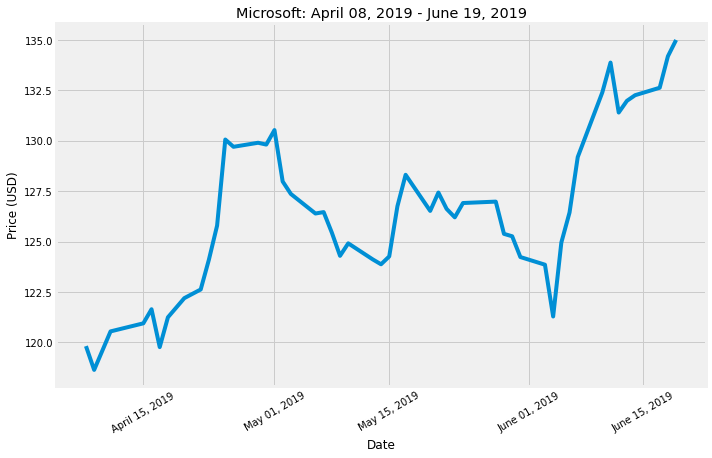

In [365]:

# Plotting Microsoft Data

format = mpl_dates.DateFormatter('%B %d, %Y')

plt.figure(figsize=(10,6))

plt.plot(date, open)

plt.title('Microsoft: {} - {}'.format(start_date, end_date))
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.gca().xaxis.set_major_formatter(format)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()